In [1]:
import os
import matplotlib.pyplot as plt
from ase.io.trajectory import Trajectory
import numpy as np
style_dir = 'results/mpl_style/physrev_mplstyle/physrev.mplstyle'

plt.style.use(style_dir)
plt.rcParams['figure.dpi'] = "300"

In [3]:
traj_path = 'testing-suite/oxirane/mds/model_trajectories'
trajs = os.listdir(traj_path)
print(trajs)

['model_combined.traj', 'model_isolated.traj', 'model_md.traj', 'model_raw.traj']


In [5]:
test_traj = 'testing-suite/oxirane/mds/model_trajectories/model_md.traj'
traj = Trajectory(test_traj)
traj[0].info

{'Coordinates': True,
 'from': True,
 'ORCA-job': True,
 'orca': True,
 'E': True,
 '-153.775039490448': True,
 'head': 'spin_flip_es2',
 'es1_energy': -4184.269625366147,
 'es2_energy': -4183.637237870504}

model_combined.traj


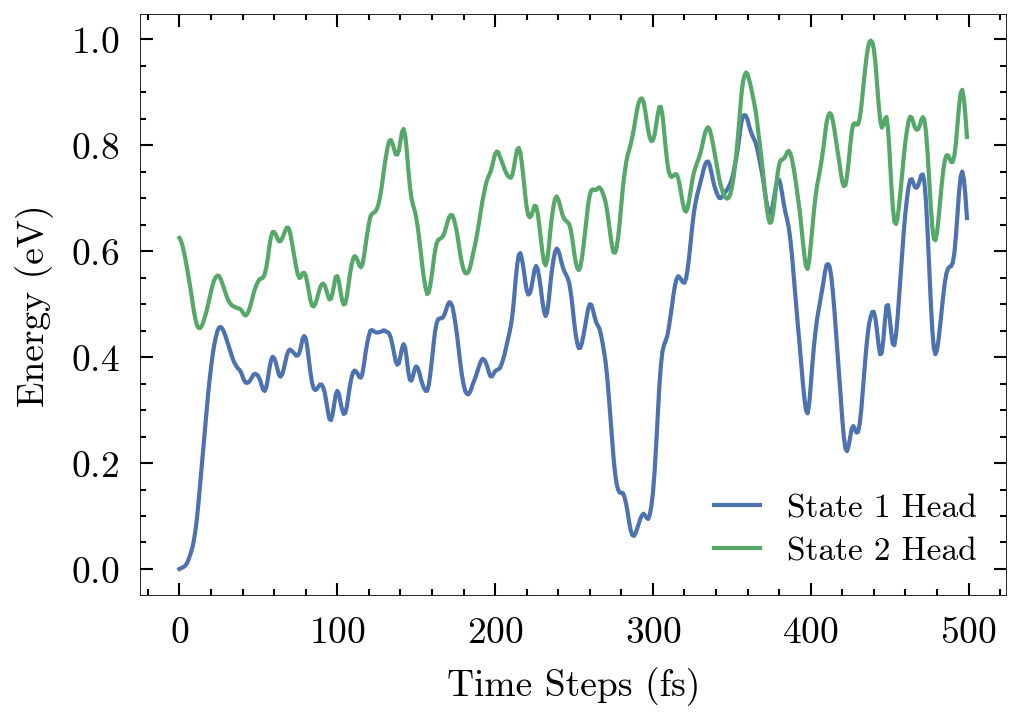

model_isolated.traj


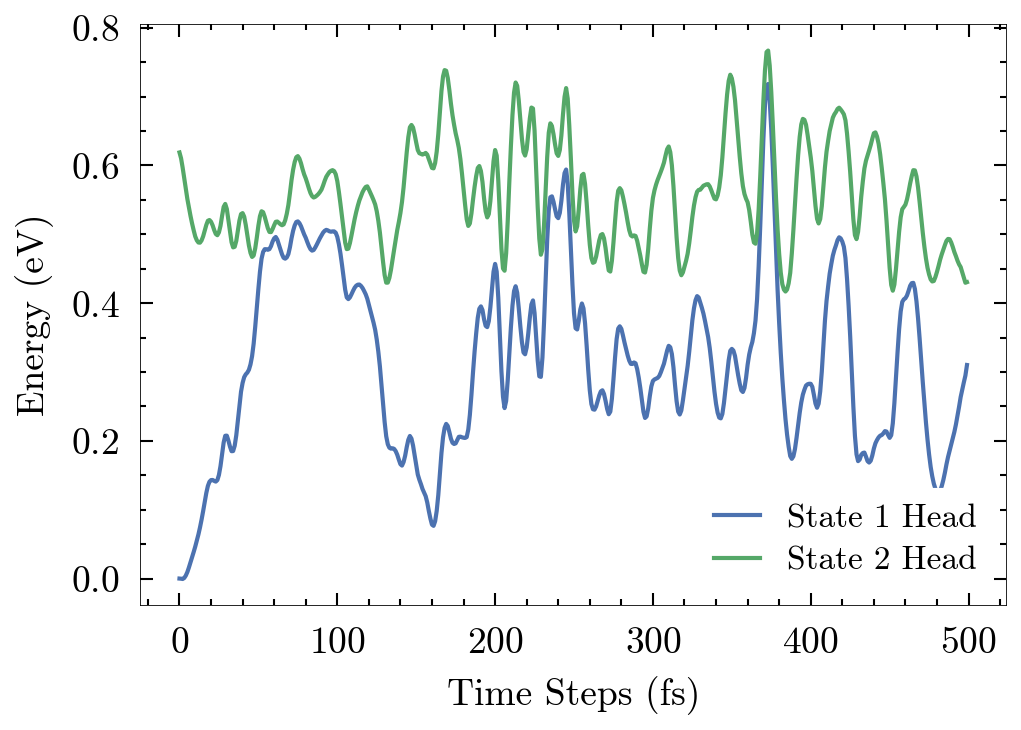

model_md.traj


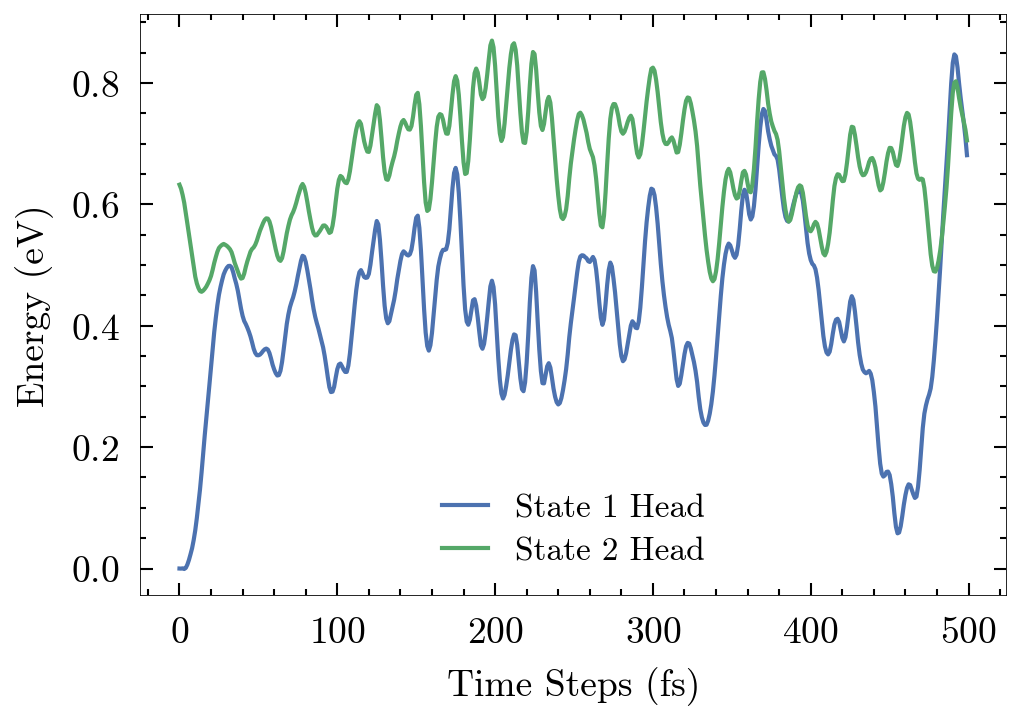

model_raw.traj


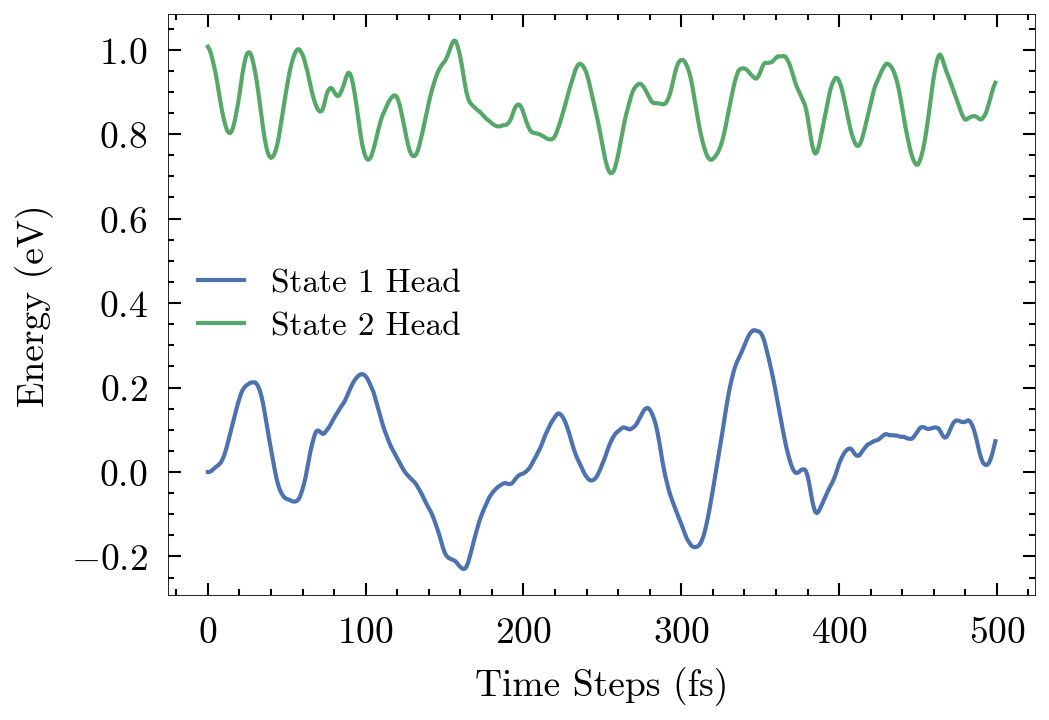

In [7]:
import matplotlib.pyplot as plt

for i, traj in enumerate(trajs):
    print(traj)
    traj_path = f'testing-suite/oxirane/mds/model_trajectories/{traj}'
    traj_obj = Trajectory(traj_path)
    
    es_1_energies = [traj_obj[i].info['es1_energy'] for i in range(len(traj_obj))]
    es_2_energies = [traj_obj[i].info['es2_energy'] for i in range(len(traj_obj))]
    zpe = es_1_energies[0]
    norm_es_1_energies = np.array(es_1_energies) - zpe
    norm_es_2_energies = np.array(es_2_energies) - zpe
    # Create a new figure for each trajectory
    fig = plt.figure(figsize =(3.5, 2.5))
    ax = fig.add_subplot(111)
    
    ax.plot(norm_es_1_energies, linestyle = '-', marker = '', label='State 1 Head', lw = 1)
    ax.plot(norm_es_2_energies, linestyle = '-', marker = '', label='State 2 Head', lw = 1)
    
    ax.set_xlabel('Time Steps (fs)')
    ax.set_ylabel('Energy (eV)')
    ax.legend()
    
    # Show the plot
    plt.show()

